In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/데이터마이닝/기말/250619/데이터통합_최종_병합 (1).csv')

In [4]:
# 컬럼명에 이상한 문자 제거
df.columns = df.columns.str.replace('\x7f', '', regex=False)

In [5]:
# 시계열 인덱스 생성
def convert_to_time_index(x):
    year, half = x.split('_')
    half_num = 1 if half == 'H1' else 2
    return float(year) + 0.5 * (half_num - 1)

In [6]:
df['time_index'] = df['연도_반기'].apply(convert_to_time_index)

In [7]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 고용률 및 순이동수 시계열

In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

plt.rc('font', family='NanumBarunGothic')

matplotlib.rcParams['axes.unicode_minus'] = True

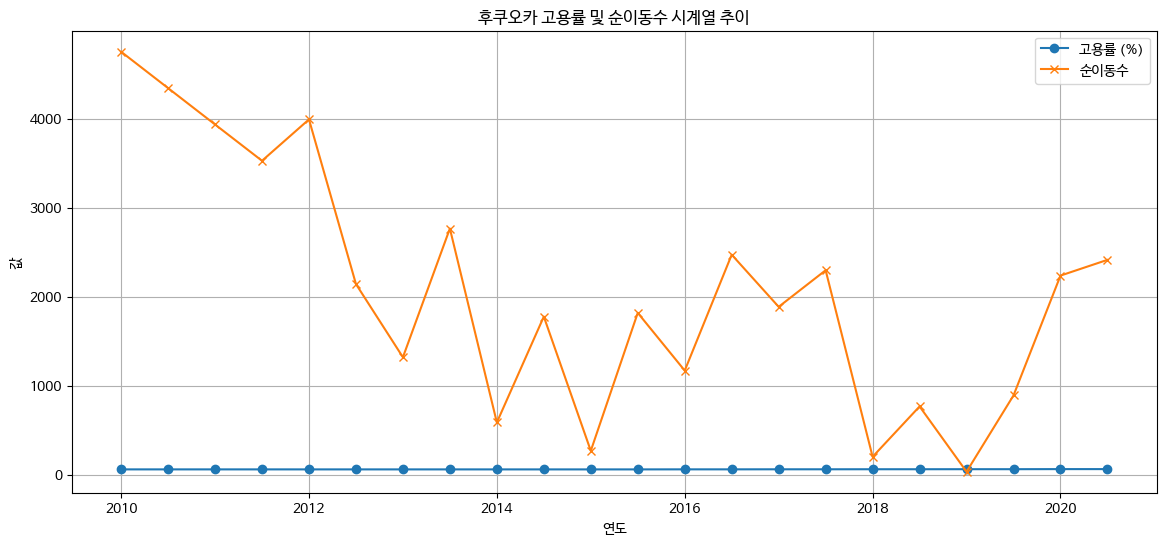

In [9]:
plt.figure(figsize=(14, 6))
plt.plot(df['time_index'], df['고용률 (%)'], marker='o', label='고용률 (%)')
plt.plot(df['time_index'], df['순이동수'], marker='x', label='순이동수')
plt.xlabel('연도')
plt.ylabel('값')
plt.title('후쿠오카 고용률 및 순이동수 시계열 추이')
plt.legend()
plt.grid(True)
plt.show()

고용률(%)은 2010 2022년 사이 대체로 59~62% 수준에서 완만하게 상승.

순이동수(인구 순유입)는 정책 시행(2014년) 이후 점진적으로 감소하는 경향.

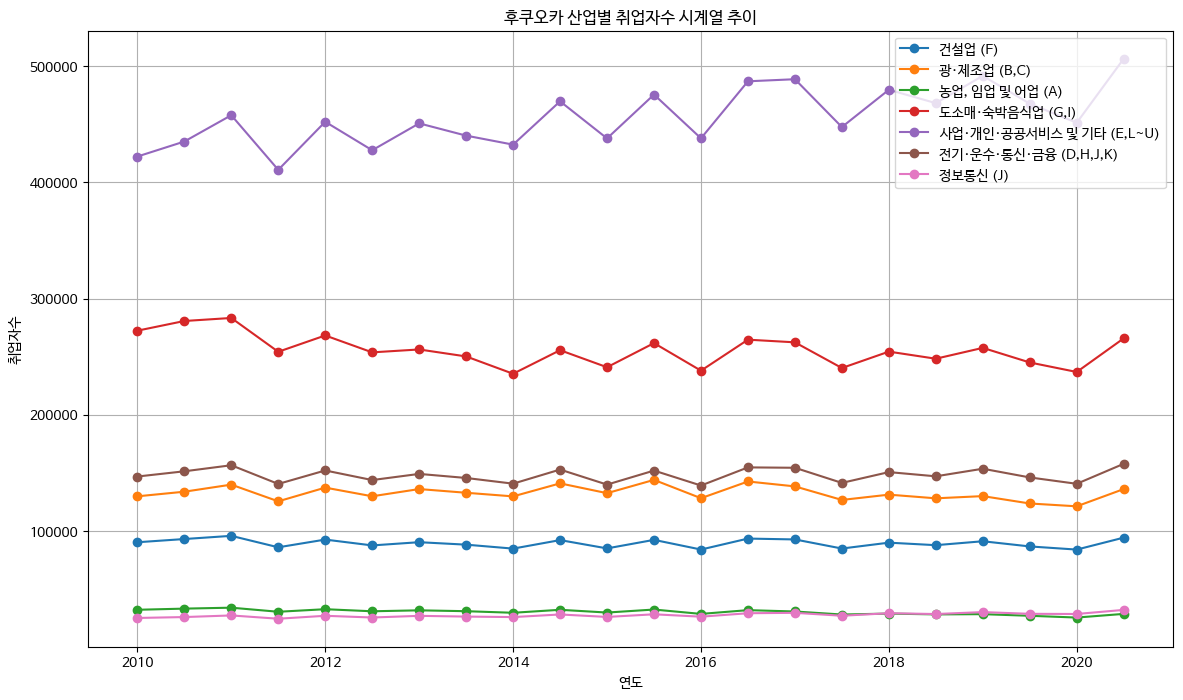

In [10]:
industry_cols = ['건설업 (F)', '광·제조업 (B,C)', '농업, 임업 및 어업 (A)', '도소매·숙박음식업 (G,I)',
                 '사업·개인·공공서비스 및 기타 (E,L~U)', '전기·운수·통신·금융 (D,H,J,K)', '정보통신 (J)']

plt.figure(figsize=(14, 8))
for col in industry_cols:
    plt.plot(df['time_index'], df[col], marker='o', label=col)
plt.xlabel('연도')
plt.ylabel('취업자수')
plt.title('후쿠오카 산업별 취업자수 시계열 추이')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
num_cols = ['고용률 (%)', '순이동수', '전입수', '전출수', '취업자_총계'] + industry_cols
policy_groups = df.groupby('정책시행')
mean_vals = policy_groups[num_cols].mean()
var_vals = policy_groups[num_cols].var()

print('정책 시행 전후 평균값:')
print(mean_vals)
print('\n정책 시행 전후 분산값:')
print(var_vals)


정책 시행 전후 평균값:
        고용률 (%)         순이동수           전입수           전출수        취업자_총계  \
정책시행                                                                     
0     59.250000  3348.875000  43396.875000  40047.875000  1.023208e+06   
1     60.414286  1344.571429  42037.642857  40693.071429  9.821236e+05   

           건설업 (F)    광·제조업 (B,C)  농업, 임업 및 어업 (A)  도소매·숙박음식업 (G,I)  \
정책시행                                                                  
0     90656.000000  133281.000000     32231.500000    264899.500000   
1     88977.928571  132527.428571     29507.642857    250496.428571   

      사업·개인·공공서비스 및 기타 (E,L~U)  전기·운수·통신·금융 (D,H,J,K)      정보통신 (J)  
정책시행                                                                 
0                436981.000000          148358.000000  26315.125000  
1                467133.714286          148041.642857  28633.428571  

정책 시행 전후 분산값:
       고용률 (%)          순이동수           전입수           전출수        취업자_총계  \
정책시행                               

고용률과 인구 순이동수, 산업별 취업자수와 인구 순이동수 등 주요 변수 간 관계 분석 </br>
필요시 그룹별(정책 전후, 연령별 등) 비교

고용률 (%)                    -0.309975
순이동수                        1.000000
취업자_총계                      0.599106
건설업 (F)                     0.390398
광·제조업 (B,C)                 0.184061
농업, 임업 및 어업 (A)             0.582839
도소매·숙박음식업 (G,I)             0.667136
사업·개인·공공서비스 및 기타 (E,L~U)   -0.366056
전기·운수·통신·금융 (D,H,J,K)       0.201569
정보통신 (J)                   -0.368107
Name: 순이동수, dtype: float64
정책시행=0, 고용률-순이동수 상관계수: 0.72098112830115
정책시행=1, 고용률-순이동수 상관계수: 0.12407905581408711


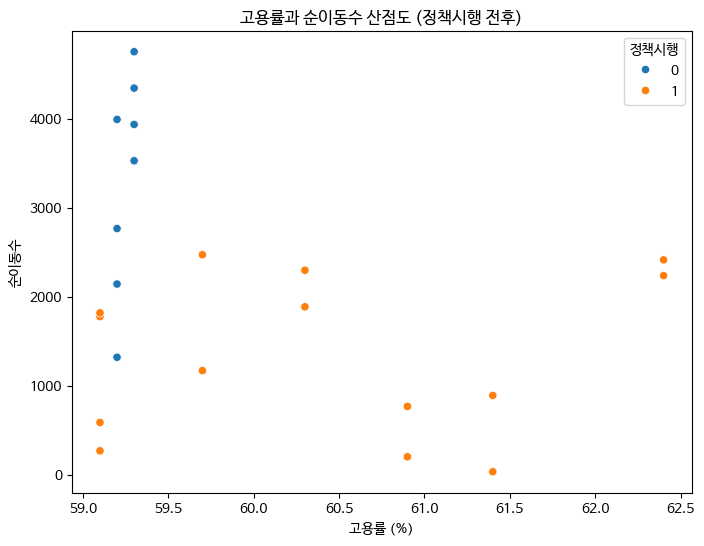

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['고용률 (%)', '순이동수', '취업자_총계', '건설업 (F)', '광·제조업 (B,C)', '농업, 임업 및 어업 (A)',
            '도소매·숙박음식업 (G,I)', '사업·개인·공공서비스 및 기타 (E,L~U)', '전기·운수·통신·금융 (D,H,J,K)', '정보통신 (J)']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 전체 상관계수
print(df[num_cols].corr()['순이동수'])

# 정책시행 전후 그룹별 상관계수
for policy, group in df.groupby('정책시행'):
    print(f'정책시행={policy}, 고용률-순이동수 상관계수:', group['고용률 (%)'].corr(group['순이동수']))

# 산점도 시각화
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='고용률 (%)', y='순이동수', hue='정책시행')
plt.title('고용률과 순이동수 산점도 (정책시행 전후)')
plt.show()
